# Orthogonal Dictionary Learning Applied to an Image Using the Alternating Minimization Method

This code solves the dictionary learning problem and compares the learned image from the dictionary with the true image.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Algorithm

Solving  $\min_{\mathbf{A},\mathbf{X}} \frac{1}{2} \| \mathbf{Y} - \mathbf{A} \mathbf{X}\|_F^2 + \lambda\|\mathbf{X}\|_1$


In [17]:
# Soft Threshold function
def soft(z, lam):     
    return np.sign(z)*np.maximum(np.abs(z)-lam,0) 

In [18]:
#Implementation of Alternating Method
def DL(Y, X0, lam, fun = lambda z:0, niter=1000, eps=1e-4): 
    '''
    Input:
        Y:     Observation Matrix
        X0:    intilalization 
        lam:   regularization parameter
        fun:   user defined function (e.g objective function)
        niter: maximum umber of iterations
        eps:   termination crtieria 
        
    Output: 
        A:     (Unitary) Dictionary Matrix 
        X:     Representation Matrix
        out:   objective value at termination 
    '''
    # initialize output matrices
    X = X0.copy()
    n, p = X.shape
    A = np.identity(n)
    
    # store values of the objective function
    out_prev = fun(A,X) # value of the objective function at previous iteration
    out = fun(A,X) # value of the objective function at current iteration
    
    # alternating method loop
    for itr in range(niter):
        
        # update A
        U, _, V = np.linalg.svd(Y @ X.T, full_matrices=False)
        A = U @ V
        
        # update X
        X = soft(A.T @ Y, lam)
        
        # update objective function
        out_prev = out
        out = fun(A,X)
        
        # check stopping condition
        if abs(out - out_prev) / abs(out)  < eps:
            return A, X, out
        
    return A, X, out 

## Loading the Images

In [19]:
import glob as gb  
import os

from PIL import Image              

In [20]:
path_img = os.getcwd()+os.path.sep+'natural_images'+os.path.sep
file_names = sorted(gb.glob(path_img+'*.pgm'))

In [21]:
Y = np.asarray(Image.open(file_names[0]))/256
Y = Y-np.mean(Y)

n = len(Y)

In [22]:
np.random.seed(0)

ld = 0.02 
obj = lambda A,X :0.5*np.linalg.norm(Y-A@X,'fro')**2+ld*np.sum(np.abs(X))

out = np.empty(20)
for i in range(20):
    _,_,out[i] = DL(Y, np.random.rand(n,n), lam=ld, fun=obj)
print("The mean of the objective fucntion in 20 random intialization: {}".format(np.mean(out)))
print("The variance of the objective fucntion in 20 random intialization: {}".format(np.var(out)))

The mean of the objective fucntion in 20 random intialization: 74.33430133305777
The variance of the objective fucntion in 20 random intialization: 0.2098997194720623


### Original Image

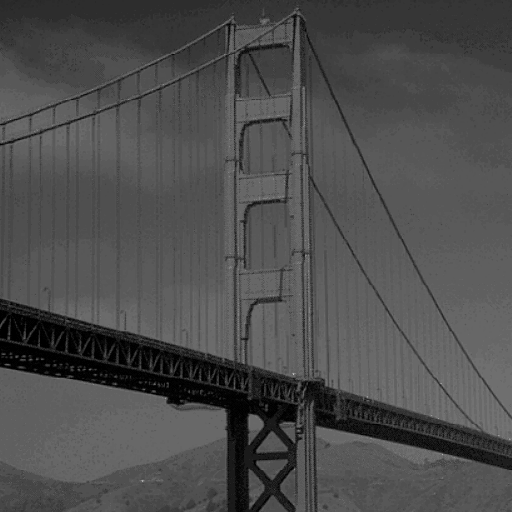

In [57]:
Image.open(file_names[0])

### Reconstructed Image with Dictionary

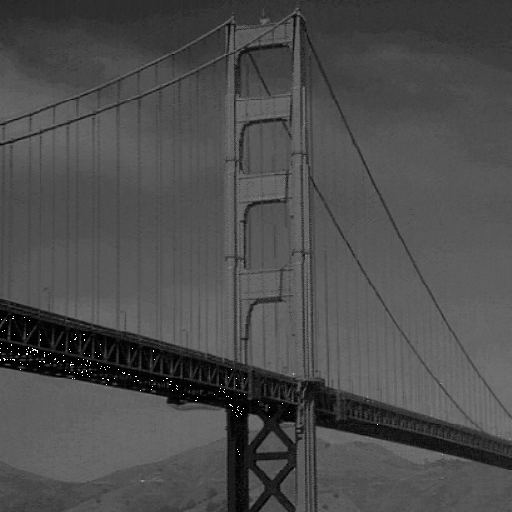

In [23]:
A, X, out = DL(Y, np.random.rand(n,n), lam=ld, fun=obj)
Y_mean = np.mean(np.asarray(Image.open(file_names[0]))/256)
Y_approx = (A@X + Y_mean)*256
image = Image.fromarray(np.array(Y_approx, dtype = np.uint8) )
image